# Unsupervised machine learning

In [1]:
#Uses unlabeled datasets, where data points do not have pre-defined labels or outputs.To discover hidden patterns, structures, or relationships within the data without explicit guidance or target variables.
#examples:Clustering: Grouping customers based on their purchasing behavior.
#Unsupervised algorithm ...->1.K-means clustering 2.KNN 3.Hierarchal clustering 4.Anomoly detection 5.Neural networks 6.Principle component analysis
#WHY ? -> a.In real world,we don't always have input data with the corresponding output so to solve such cases,we need unsupervised learning.Used to find hidden structure of data.
#Two types - 1.clustering ->It finds the commonalities between the data obj and Grouping them into clusters such that objects with most similarities remains into a group.Rawdata->algorithm->output
            #2.Assosiation -> Used to find the relationships between variables in the large dataset.example = {Bread,Egg}->Milk(itemset ={Bread,egg,milk})
#ADVANTAGES -> 1.works on more complex data 2.easy to get unlabelled data.    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])

In [13]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)
print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")

Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


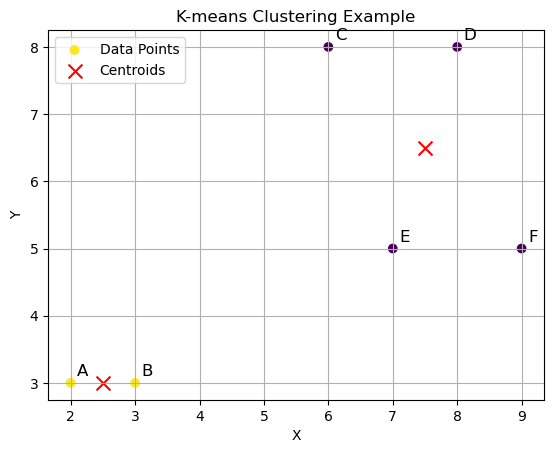

In [10]:
# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')\
# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


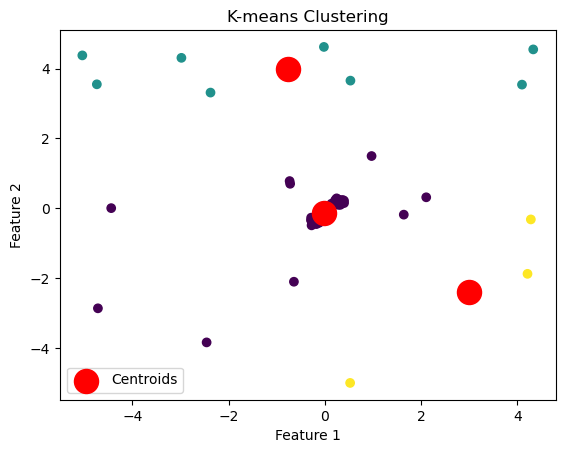

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'kmeans_dataset_with_outliers.csv'
data = pd.read_csv(file_path)

# Step 2: Drop the last column
data = data.iloc[:, :-1]  # Drop the last column

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Apply K-means clustering
# Choose the number of clusters (k)
k = 3  # You can change this based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Step 5: Visualize the results (if applicable)
# Assuming the data has 2 features for easy visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

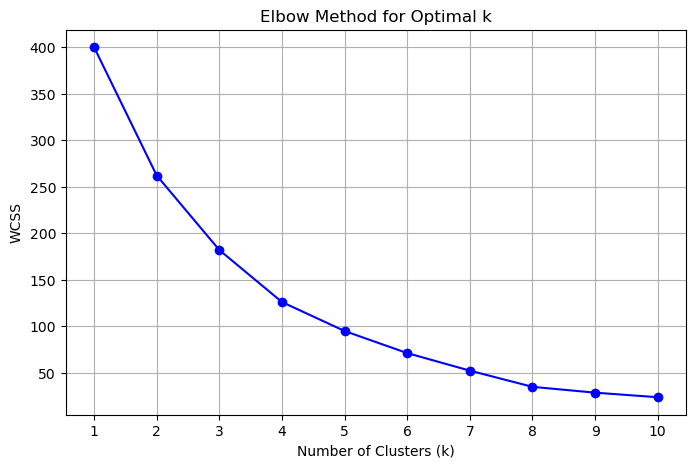

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


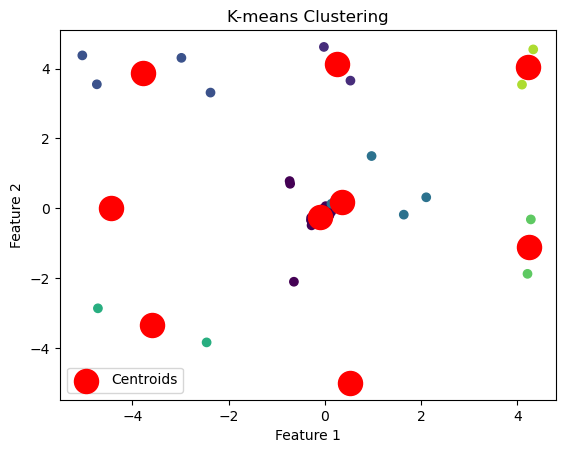

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'kmeans_dataset_with_outliers.csv'
data = pd.read_csv(file_path)

# Step 2: Drop the last column
data = data.iloc[:, :-1]  # Drop the last column

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Use the Elbow Method to find the optimal number of clusters
wcss = []  # List to store Within-Cluster Sum of Squares

# Try different k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Store WCSS

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Step 6: Choose the best k (from the elbow point)
optimal_k = 9 # Change this based on the elbow method visualization

# Step 7: Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Step 8: Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Hierarchical clustering

#AGGLOMERATIVE CLUSTERING

In [47]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
x = np.array([[1,2],[1,4],[1,0],
            [4,2],[4,4],[4,0]])
clustering = AgglomerativeClustering(n_clusters=2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


#DIVISIVE CLUSTERING

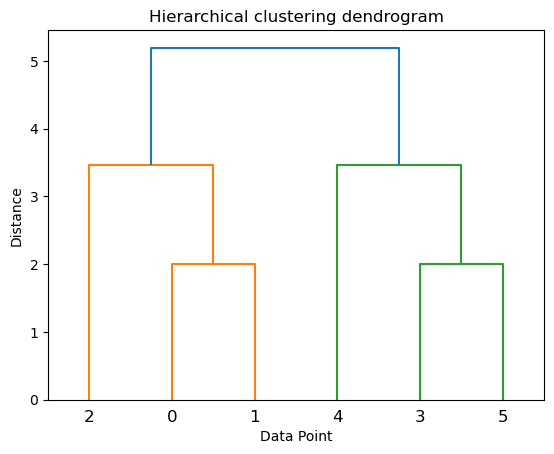

In [49]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
x = np.array([[1,2],[1,4],[1,0],
            [4,2],[4,4],[4,0]])
z=linkage(x,'ward')
dendrogram(z)
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

In [70]:
df=pd.read_csv('marketing_campaign.csv',delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [71]:
df.shape

(2240, 29)

In [59]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
count                                                2240                                                                                                                                                                                                                                                                                                                                                  
unique                                               2240                                                                                                                                  

In [73]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [75]:
df=df.dropna(subset=['Income'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [76]:
df['Income'].fillna(df['Income'].median(),inplace=True)
df.isnull().sum()

C:\Users\CVR\AppData\Local\Temp\ipykernel_5908\543345040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'].fillna(df['Income'].median(),inplace=True)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [78]:
df = df.drop_duplicates()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,NaT,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,NaT,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,NaT,8,428,...,3,0,0,0,0,0,0,3,11,0



Cluster Assignments:
Point 1 (5524, 1957): Cluster 2
Point 2 (2174, 1954): Cluster 1
Point 3 (4141, 1965): Cluster 2
Point 4 (6182, 1984): Cluster 1
Point 5 (5324, 1981): Cluster 2
Point 6 (7446, 1967): Cluster 2
Point 7 (965, 1971): Cluster 1
Point 8 (6177, 1985): Cluster 1
Point 9 (4855, 1974): Cluster 1
Point 10 (5899, 1950): Cluster 1
Point 11 (387, 1976): Cluster 1
Point 12 (2125, 1959): Cluster 2
Point 13 (8180, 1952): Cluster 2
Point 14 (2569, 1987): Cluster 1
Point 15 (2114, 1946): Cluster 2
Point 16 (9736, 1980): Cluster 1
Point 17 (4939, 1946): Cluster 1
Point 18 (6565, 1949): Cluster 2
Point 19 (2278, 1985): Cluster 1
Point 20 (9360, 1982): Cluster 1
Point 21 (5376, 1979): Cluster 1
Point 22 (1993, 1949): Cluster 1
Point 23 (4047, 1954): Cluster 2
Point 24 (1409, 1951): Cluster 1
Point 25 (7892, 1969): Cluster 1
Point 26 (2404, 1976): Cluster 1
Point 27 (9422, 1989): Cluster 1
Point 28 (1966, 1965): Cluster 2
Point 29 (6864, 1989): Cluster 1
Point 30 (3033, 1963): Cluster 1

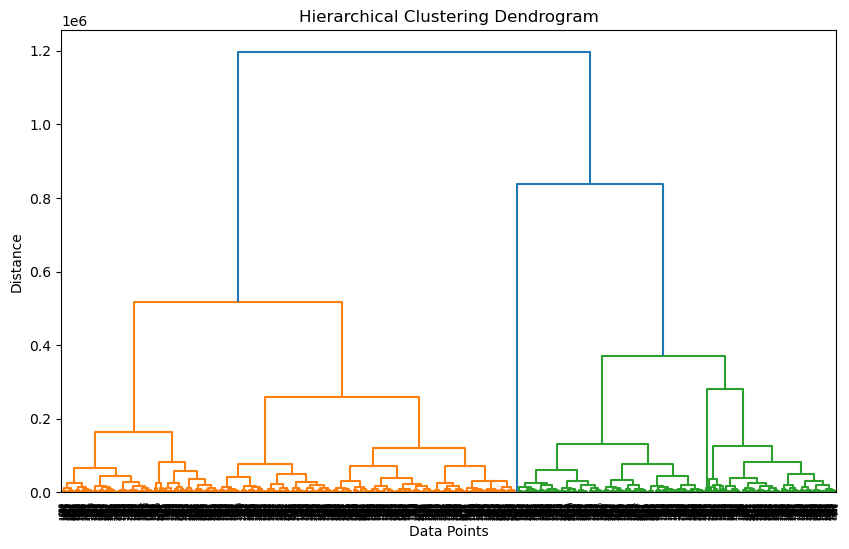

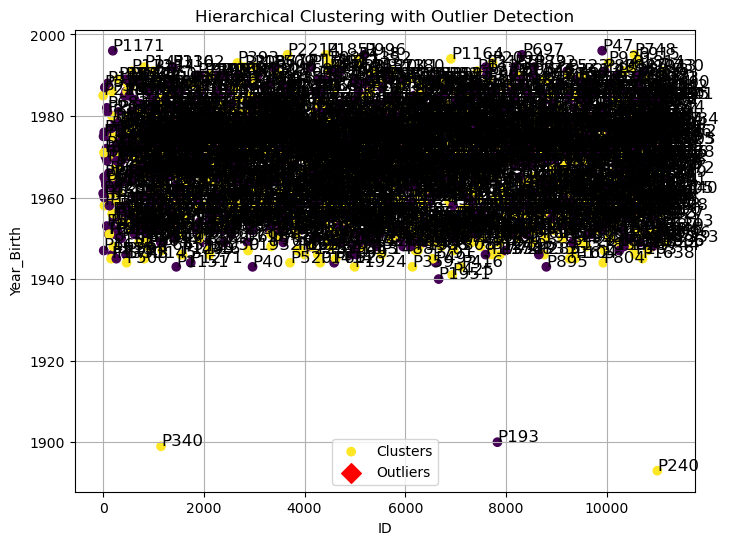

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Select only numerical columns for clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols].values  # Convert to NumPy array

# Perform Hierarchical Clustering (Ward’s Method)
linkage_matrix = linkage(data, method='ward')

# Assign Cluster Labels (Assuming 2 clusters like before)
df['Cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust') - 1  # Subtract 1 for 0-based index

# Identify Potential Outliers (Same approach as K-Means)
distances = np.min(linkage_matrix[:, 2])  # Use minimum linkage distances
outlier_threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > outlier_threshold

# Print Cluster Assignments with Outlier Detection
feature_x = numeric_cols[0]
feature_y = numeric_cols[1]

print("\nCluster Assignments:")
for i, (x, y, cluster, is_outlier) in enumerate(df[[feature_x, feature_y, 'Cluster', 'Outlier']].values):
    status = "Outlier" if is_outlier else f"Cluster {cluster+1}"
    print(f"Point {i+1} ({x}, {y}): {status}")

# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# ✅ Plot Hierarchical Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_x], df[feature_y], c=df['Cluster'], cmap='viridis', marker='o', label='Clusters')

# Highlight Outliers
outliers = df[df['Outlier']]
plt.scatter(outliers[feature_x], outliers[feature_y], c='red', marker='D', s=100, label='Outliers')

# Annotate Points
for i, row in df.iterrows():
    plt.text(row[feature_x] + 0.2, row[feature_y] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Hierarchical Clustering with Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

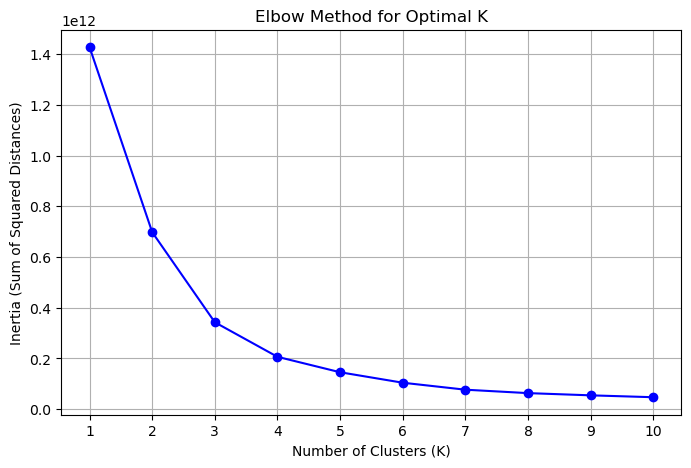

Enter the optimal number of clusters (K) from the elbow graph: 8


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(



Final Centroids (Cluster Centers):
 [[ 5.63427252e+03  1.97152703e+03  3.32857770e+04  8.49099099e-01
   3.96396396e-01  4.70000000e+01  4.00765766e+01  5.77252252e+00
   2.69819820e+01  9.80630631e+00  5.76576577e+00  1.68130631e+01
   2.11936937e+00  2.19369369e+00  5.27027027e-01  3.25675676e+00
   6.70270270e+00  9.00900901e-02  6.75675676e-03 -4.16333634e-17
   2.25225225e-03  0.00000000e+00  1.80180180e-02  3.00000000e+00
   1.10000000e+01  1.10360360e-01 -2.22044605e-16]
 [ 5.89389500e+03  1.96718250e+03  7.03167025e+04  1.15000000e-01
   4.77500000e-01  4.86625000e+01  5.78752500e+02  5.16975000e+01
   3.22920000e+02  7.52625000e+01  5.18400000e+01  6.91800000e+01
   1.96500000e+00  5.60000000e+00  4.78500000e+00  8.49500000e+00
   3.69500000e+00  4.50000000e-02  1.02500000e-01  8.50000000e-02
   1.00000000e-01  1.25000000e-02  7.50000000e-03  3.00000000e+00
   1.10000000e+01  1.42500000e-01  1.00000000e+00]
 [ 9.43200000e+03  1.97700000e+03  6.66666000e+05  1.00000000e+00
   

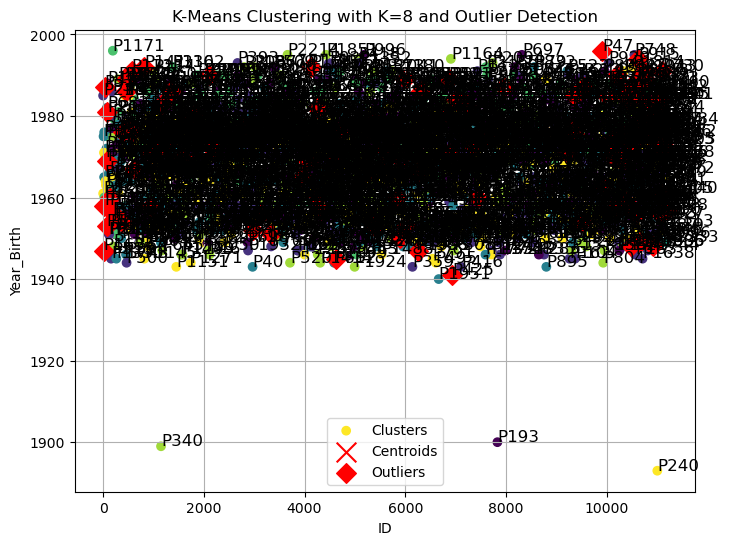

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ensure 'df' is defined before selecting numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols].values  # Convert to NumPy array

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)  # Checking K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)  # Inertia = sum of squared distances to closest centroid

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show

# Choose the best K (manual selection based on elbow curve)
optimal_k = int(input("Enter the optimal number of clusters (K) from the elbow graph: "))

# Perform K-Means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Identify potential outliers
distances = np.min(kmeans.transform(data), axis=1)
outlier_threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > outlier_threshold

# Print Final Centroids
print("\nFinal Centroids (Cluster Centers):\n", centroids)

# Choose features for visualization
if len(numeric_cols) < 2:
    raise ValueError("Not enough numerical columns for plotting. Ensure at least two numerical features exist.")
feature_x, feature_y = numeric_cols[:2]

# Print Cluster Assignments with Outlier Detection
print("\nCluster Assignments:")
for i, (x, y, cluster, is_outlier) in enumerate(df[[feature_x, feature_y, 'Cluster', 'Outlier']].values):
    status = "Outlier" if is_outlier else f"Cluster {cluster+1}"
    print(f"Point {i+1} ({x}, {y}): {status}")

# Plot Clusters with Correct Features
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_x], df[feature_y], c=df['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Highlight Outliers
outliers = df[df['Outlier']]
plt.scatter(outliers[feature_x], outliers[feature_y], c='red', marker='D', s=100, label='Outliers')

# Annotate Points
for i, row in df.iterrows():
    plt.text(row[feature_x] + 0.2, row[feature_y] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'K-Means Clustering with K={optimal_k} and Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()